In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
os.chdir('../code')
from em_alg import EmAlgorithm, StochasticEmAlgorithm, EmBivariateNormal
from scipy.stats import norm, multinomial, multivariate_normal, gamma

In [46]:
df = pd.read_csv('../data/galaxies.csv')
df.columns = ['galaxy', 'velocities']

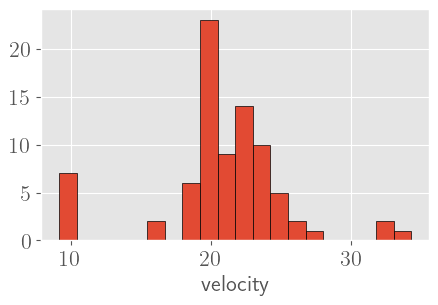

In [47]:
plt.figure(figsize=(5, 3))
plt.hist(df['velocities'], edgecolor='black', bins=20)
plt.xlabel('velocity');

 22%|████████████████████████████████████████▌                                                                                                                                                 | 436/1999 [00:00<00:01, 928.17it/s]


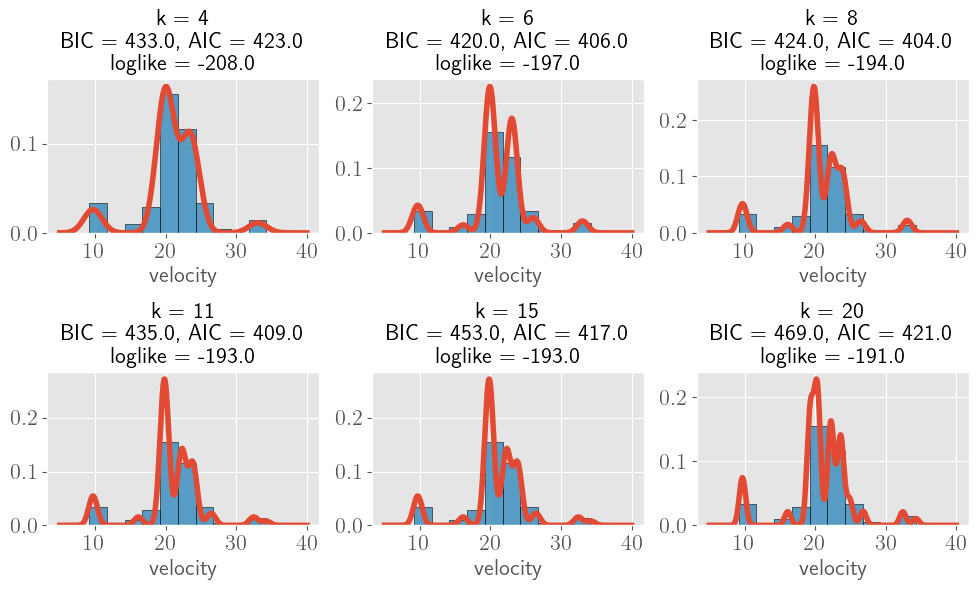

In [48]:
ks = [4,6,8,11,15,20]
x = np.linspace(5, 40, 1000)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
#np.random.seed(1)
for i, k in enumerate(ks):
    em = EmAlgorithm(y=df['velocities'].to_numpy(), pooled_sigma=True, k=k, max_iter=2000, tol=1e-40)
    params = em.fit()
    pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
    aic = np.round(2*k - 2*params['loglike'])
    bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
    axes[i].plot(x, pdf)
    axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
    axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
    axes[i].set_xlabel('velocity')
    gm = GaussianMixture(n_components=k, random_state=0).fit(df['velocities'].to_numpy().reshape(-1, 1))
fig.tight_layout() 
#plt.savefig('../figures/galaxies_1.png', dpi=300)

  0%|                                                                                                                                                                                                     | 0/9999 [00:00<?, ?it/s]/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|                                                                                                                                                                                                     | 0/9999 [00:00<?, ?it/s]/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: R

KeyboardInterrupt: 

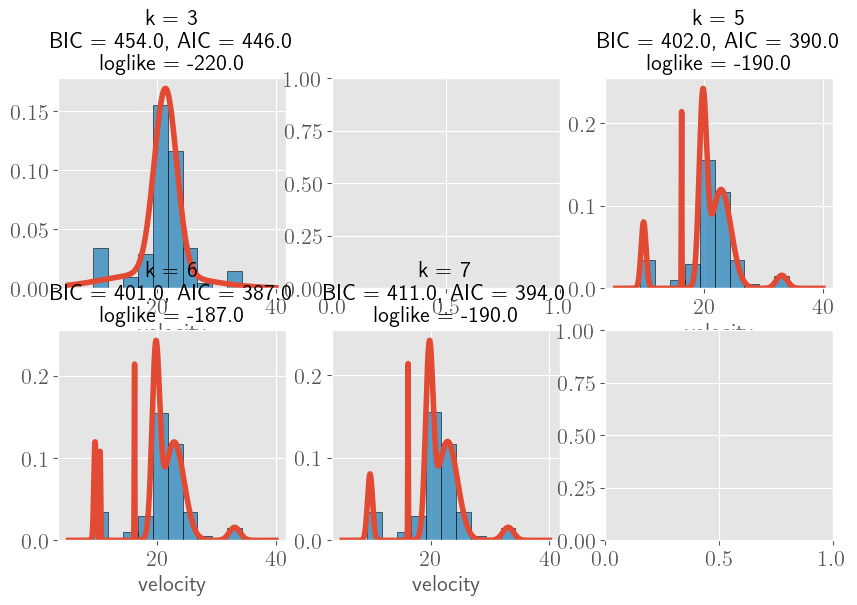

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
ks = [3,4,5,6,7,8]
x = np.linspace(5, 40, 1000)
#np.random.seed(1234)
for i, k in enumerate(ks):
    em = EmAlgorithm(y=df['velocities'].to_numpy(), pooled_sigma=False, n_wait=10, k=k, max_iter=10000, tol=1e-6)
    params = em.fit()
    try:
        pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
        aic = np.round(2*k - 2*params['loglike'])
        bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
        axes[i].plot(x, pdf)
        axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
        axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
        axes[i].set_xlabel('velocity')
        gm = GaussianMixture(n_components=k, random_state=0).fit(df['velocities'].to_numpy().reshape(-1, 1))
    except:
        pass
    
fig.tight_layout() 
#plt.savefig('../figures/galaxies_2.png', dpi=300)

In [ ]:
ks = [4,6,8,11,15,20]
x = np.linspace(5, 40, 1000)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
#np.random.seed(5050)
for i, k in enumerate(ks):
    try:
        em = StochasticEmAlgorithm(y=df['velocities'].to_numpy(), n_wait=0, pooled_sigma=True, k=k, max_iter=5000, tol=1e-99)
        params = em.fit()
        pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
        aic = np.round(2*k - 2*params['loglike'])
        bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
        axes[i].plot(x, pdf)
        axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
        axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
        axes[i].set_xlabel('velocity')
    except:
        pass
fig.tight_layout() 
#plt.savefig('../figures/galaxies_3.png', dpi=300)

  0%|                                                                                                                                                                                                     | 0/9999 [00:00<?, ?it/s]/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|                                                                                                                                                                                             | 1/9999 [00:00<23:46,  7.01it/s]/Users/juliette/opt/anaconda3/envs/statmod1/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2085: R

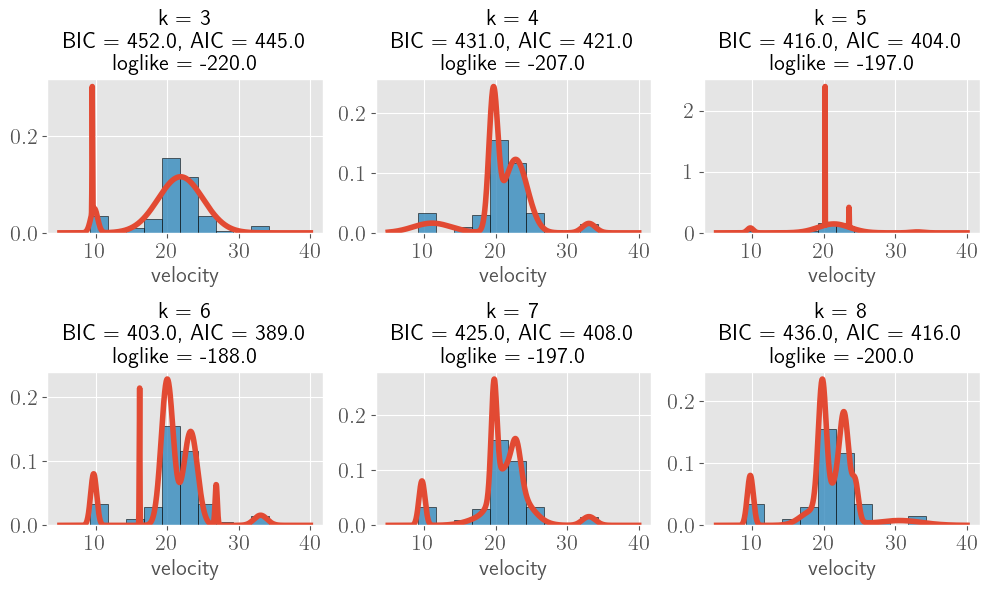

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
ks = [3,4,5,6,7,8]
x = np.linspace(5, 40, 1000)
#i = int(np.random.uniform(0, 1000))
np.random.seed(6)
for i, k in enumerate(ks):
    em = StochasticEmAlgorithm(y=df['velocities'].to_numpy(), pooled_sigma=False, n_wait=10, k=k, max_iter=10000, tol=1e-5)
    try:
        params = em.fit()
        pdf = np.sum(params['weights'] * norm(params['mus'], params['std']).pdf(np.vstack([x] * k).T), axis=1)
        aic = np.round(2*k - 2*params['loglike'])
        bic = np.round(k * np.log(len(df['velocities'].to_numpy())) - 2*params['loglike'])
        axes[i].plot(x, pdf)
        axes[i].hist(df['velocities'].to_numpy(), density=True, alpha=.8, edgecolor='black')
        axes[i].set_title(f'k = {k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(params["loglike"])}')
        axes[i].set_xlabel('velocity')
        gm = GaussianMixture(n_components=k, random_state=0).fit(df['velocities'].to_numpy().reshape(-1, 1))
    except:
        pass
    
fig.tight_layout() 
plt.savefig('../figures/galaxies_4.png', dpi=300)

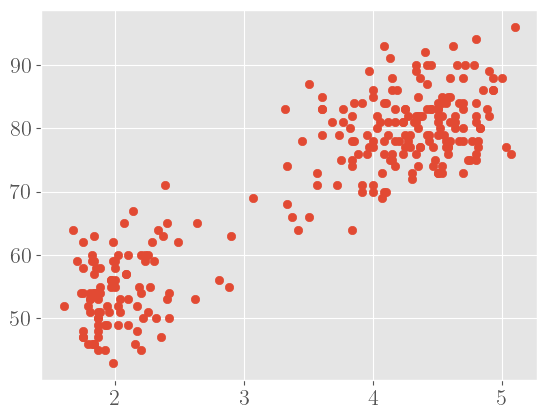

In [3]:
np.random.seed(1111)
df = pd.read_csv('../data/faithful.csv')
data = df[['eruptions', 'waiting']].to_numpy()
#df.columns = ['galaxy', 'velocities']
plt.scatter(df['eruptions'], df['waiting'])

In [26]:
def calculate_pdf(data, em, n_points=100):
    x = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), n_points)
    y = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), n_points)
    xx, yy = np.meshgrid(x, y)
    xx, yy = xx.flatten(), yy.flatten()
    xy = np.vstack([xx, yy]).T
    pdfs = [em.weights[k] * multivariate_normal.pdf(xy, mean=em.means[k, :], cov=em.covs[k], allow_singular=True) for k in range(em.k)]
    return x, y, np.sum(pdfs, axis=0)


  1%|██▌                                                                                                                                                                                       | 28/2000 [00:00<00:01, 1082.00it/s]


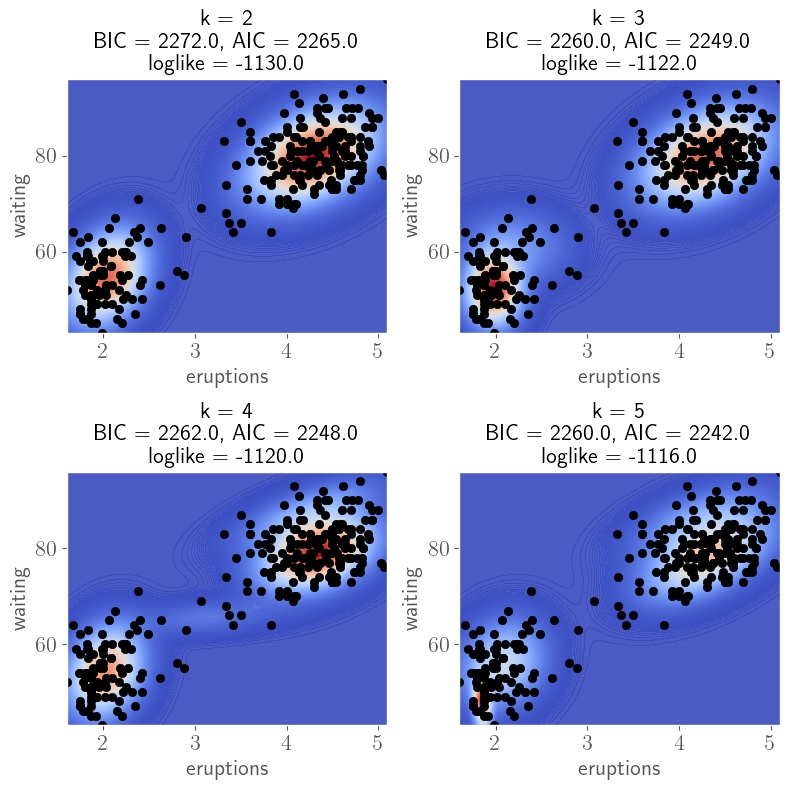

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()
ks = [2,3,4,5]
seeds = [417, 46664, 39535, 70948]
for i, k in enumerate(ks):
    np.random.seed(seeds[i])
    em = EmBivariateNormal(data, k=k, max_iter=2000)
    em.fit()
    x, y, density = calculate_pdf(data, em)
    density = density.reshape(100, 100)
    axes[i].contourf(x, y, density, cmap='coolwarm', levels=1000, alpha=.9)
    axes[i].scatter(df['eruptions'], df['waiting'], color='black')
    axes[i].set_xlabel('eruptions')
    axes[i].set_ylabel('waiting')

    aic = np.round(2*em.k - 2*em.log_likes[-1])
    bic = np.round(em.k * np.log(data.shape[0]) - 2*em.log_likes[-1])
    axes[i].set_title(f'k = {em.k}\n BIC = {bic}, AIC = {aic}\n loglike = {np.round(em.log_likes[-1])}')
    
    #plt.savefig('../figures/bivariate.png', dpi=300, bbox_inches='tight')
fig.tight_layout()
plt.savefig('../figures/bivariate.png', dpi=300, bbox_inches='tight')

In [102]:
n = 10000
samples = np.zeros((2, n))
for i in range(n):
    variance = 1/gamma(.5, 1/.5).rvs()
    mu = norm(0, np.sqrt(variance)).rvs()
    samples[:, i] = [mu, variance]

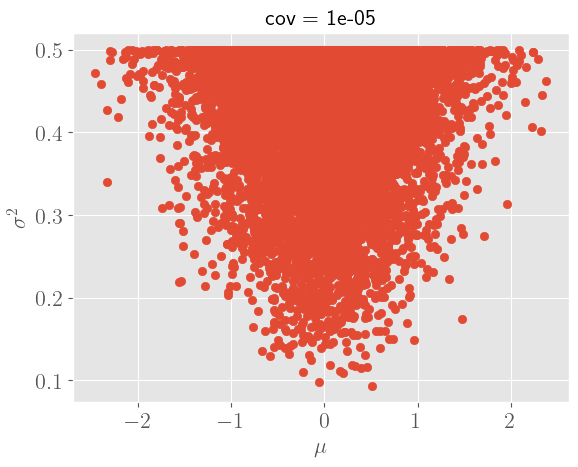

In [103]:
plt.scatter(samples[0, :], samples[1, :])
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title(f'cov = {np.round(np.cov(samples)[0, 1], 5)}')
plt.savefig('../figures/nig_correlation.png', dpi=300, bbox_inches='tight')

In [285]:
def calc_joint_posterior(sigma_sq, mu, n, samples):
    A = (n-1) * np.var(samples, ddof=1)
    B = n*(mu - np.mean(samples))**2
    return  np.exp(-1/(2*sigma_sq) * (A+B))
  #  return  sigma_sq**(-(n/2+1)) * np.exp(-1/(2*sigma_sq)*((n-1) * np.var(samples))) * np.exp(-1/(2*sigma_sq)*n*(mu - np.mean(samples)**2))
   # return  np.exp(-1/(2*sigma_sq)*n*(mu - np.mean(samples)**2))




In [366]:
n = 1000
samples = norm(0, 1).rvs(n)
mus = np.linspace(-5, 5, 550)
sigmas_sq = np.linspace(2, 100, 500)
m, s2 = np.meshgrid(mus, sigmas_sq)
#m = m.flatten()
#s2 = s2.flatten()

In [367]:
density = calc_joint_posterior(s2, m, n, samples)

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_27812/3311541736.py:1: RuntimeWarning: divide by zero encountered in log
  plt.contour(mus, sigmas_sq, np.log(density), cmap='coolwarm', levels=500)


Text(0, 0.5, '$\\sigma^2$')

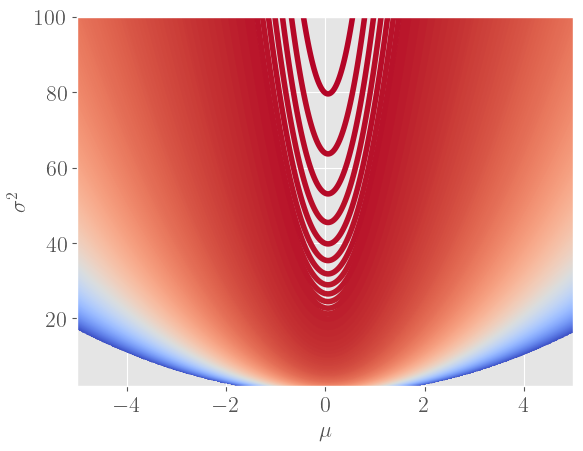

In [368]:
plt.contour(mus, sigmas_sq, np.log(density), cmap='coolwarm', levels=500)
#plt.colorbar()
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')

In [360]:
density.shape

(500, 550)

In [362]:
np.argmax(density, axis=0)

array([499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499,
       499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 49

In [357]:
density.shape

(500, 550)

In [106]:

posteriors = np.zeros((2, n_its))
for i in range(n_its):
    sigmas = gamma(n/2, 0.5 * ((n-1)*np.var(samples) + n*(0 - np.mean(samples)**2))).rvs()
    posteriors[:, i] = [mus, sigmas]

In [ ]:
def calculate_mu_post(mu, sigma):
    norm(samples.mean(), np.sqrt(sigmas/n)).rvs()
    

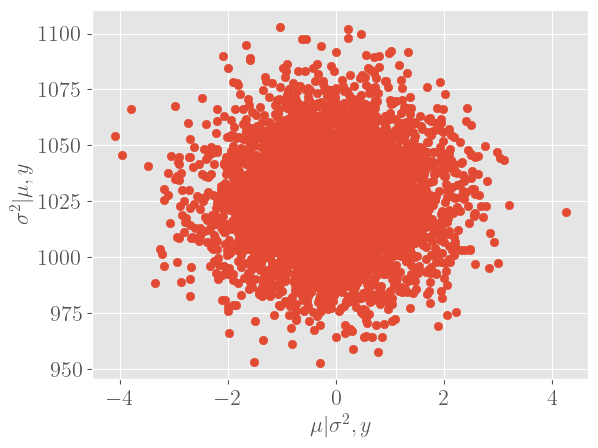

In [108]:
plt.scatter(posteriors[0, :], posteriors[1, :])
plt.xlabel('$\mu|\sigma^2, y$')
plt.ylabel('$\sigma^2|\mu, y$')
plt.savefig('../figures/IP_correlation.png', dpi=300, bbox_inches='tight')